In [2]:
from plotnine import *
import pandas as pd

In [30]:
def show_error_rate(df):
    fold1_total_errs = df['fold_1_fp_errs'].sum() + df['fold_1_fn_errs'].sum()
    fold2_total_errs = df['fold_2_fp_errs'].sum() + df['fold_2_fn_errs'].sum()

    fold1_total_labels = df['fold_1_total_labels'].sum()
    fold2_total_labels = df['fold_2_total_labels'].sum()

    rate1 = 100*(fold1_total_labels - fold1_total_errs)/fold1_total_labels
    rate2 = 100*(fold2_total_labels - fold2_total_errs)/fold2_total_labels

    return rate1, rate2

In [31]:
df_linear_filter_exactlambda_HSE   = pd.read_csv('linear_filter_exactlambda_HSE.csv')
df_linear_filter_exactlambda_MSE   = pd.read_csv('linear_filter_exactlambda_MSE.csv')
df_linear_filter_roundlambda_MSE   = pd.read_csv('linear_filter_roundlambda_MSE.csv')
df_linear_nofilter_exactlambda_HSE = pd.read_csv('linear_nofilter_exactlambda_HSE.csv')
df_linear_nofilter_roundlambda_HSE = pd.read_csv('linear_nofilter_roundlambda_HSE.csv')

dfs = [df_linear_filter_exactlambda_HSE, 
       df_linear_filter_exactlambda_MSE,
       df_linear_filter_roundlambda_MSE,
       df_linear_nofilter_exactlambda_HSE,
       df_linear_nofilter_roundlambda_HSE
       ]

In [101]:
methods = ['filter_exactlambda_HSE',
           'filter_exactlambda_MSE',
           'filter_roundlambda_MSE',
           'nofilter_exactlambda_HSE',
           'nofilter_roundlambda_HSE',
           'results from paper']

In [102]:
acc_1 = []
acc_2 = []
for df in dfs:
    rate1, rate2 = show_error_rate(df)
    acc_1.append(rate1)
    acc_2.append(rate2)

In [103]:
acc_1.append(78)
acc_2.append(72)

In [105]:
# Creating sample data for fold 1
data_fold1 = pd.DataFrame({
    'Method':   methods,
    'Accuracy': acc_1,
    'Fold': 'Fold 1 Test'
})

# Creating sample data for fold 2
data_fold2 = pd.DataFrame({
    'Method': methods,
    'Accuracy': acc_2,
    'Fold': 'Fold 2 Test'
})

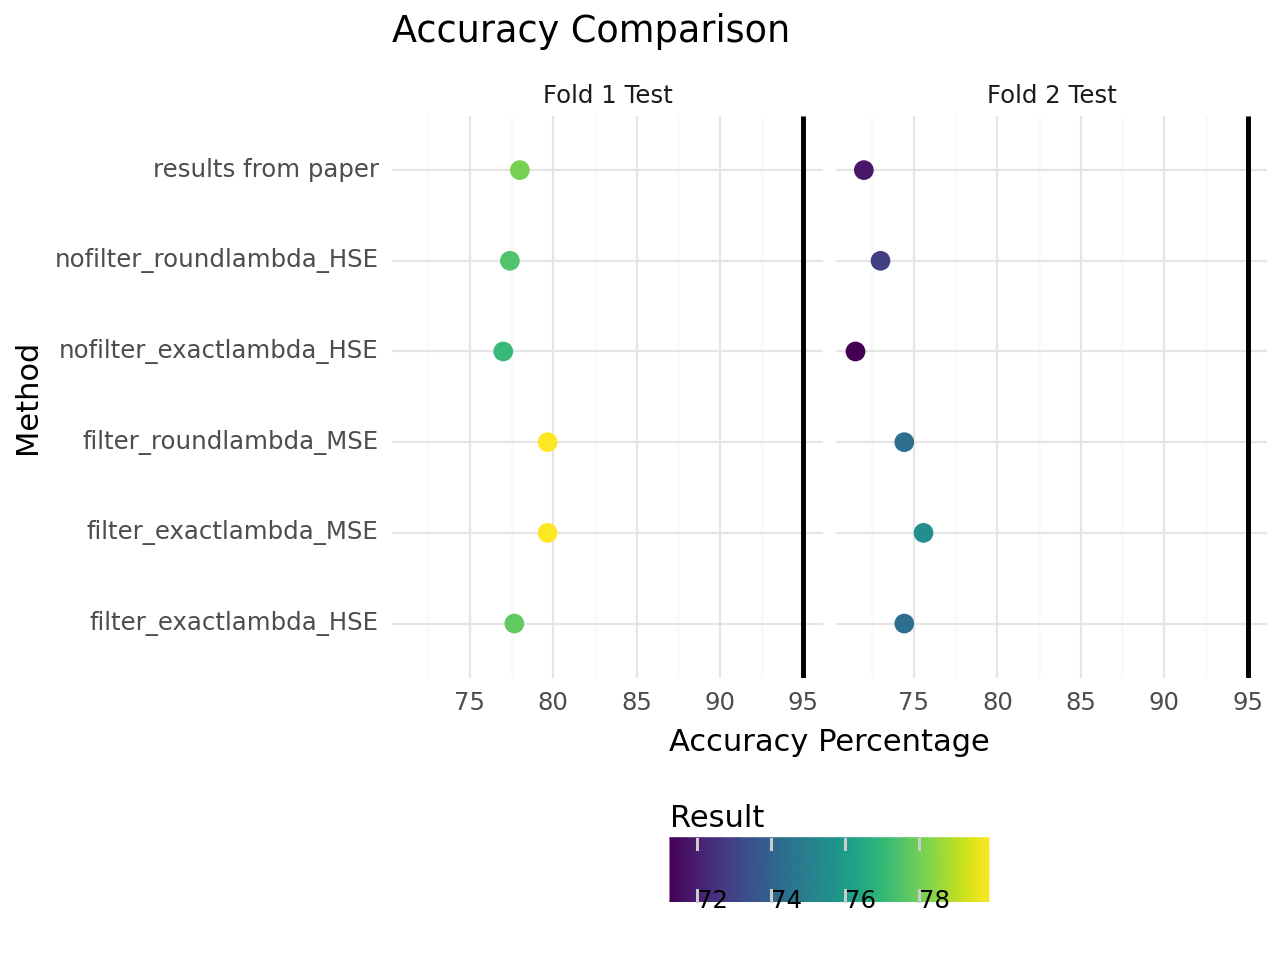

In [106]:
# Combining data for both folds
data = pd.concat([data_fold1, data_fold2])

# Plotting
plot_combined = (ggplot(data, aes(x='Accuracy', y='Method', color='Accuracy')) +
                 geom_point(size=3) +
                 labs(title="Accuracy Comparison",
                      x="Accuracy Percentage",
                      y="Method",
                      color="Result") +
                 facet_wrap('~Fold', ncol=2) +
                 geom_vline(xintercept=95, color="black", size=1) +
                 theme_minimal() +
                 theme(legend_position='bottom'))  # Adjust legend position

# Displaying the combined plot
print(plot_combined)

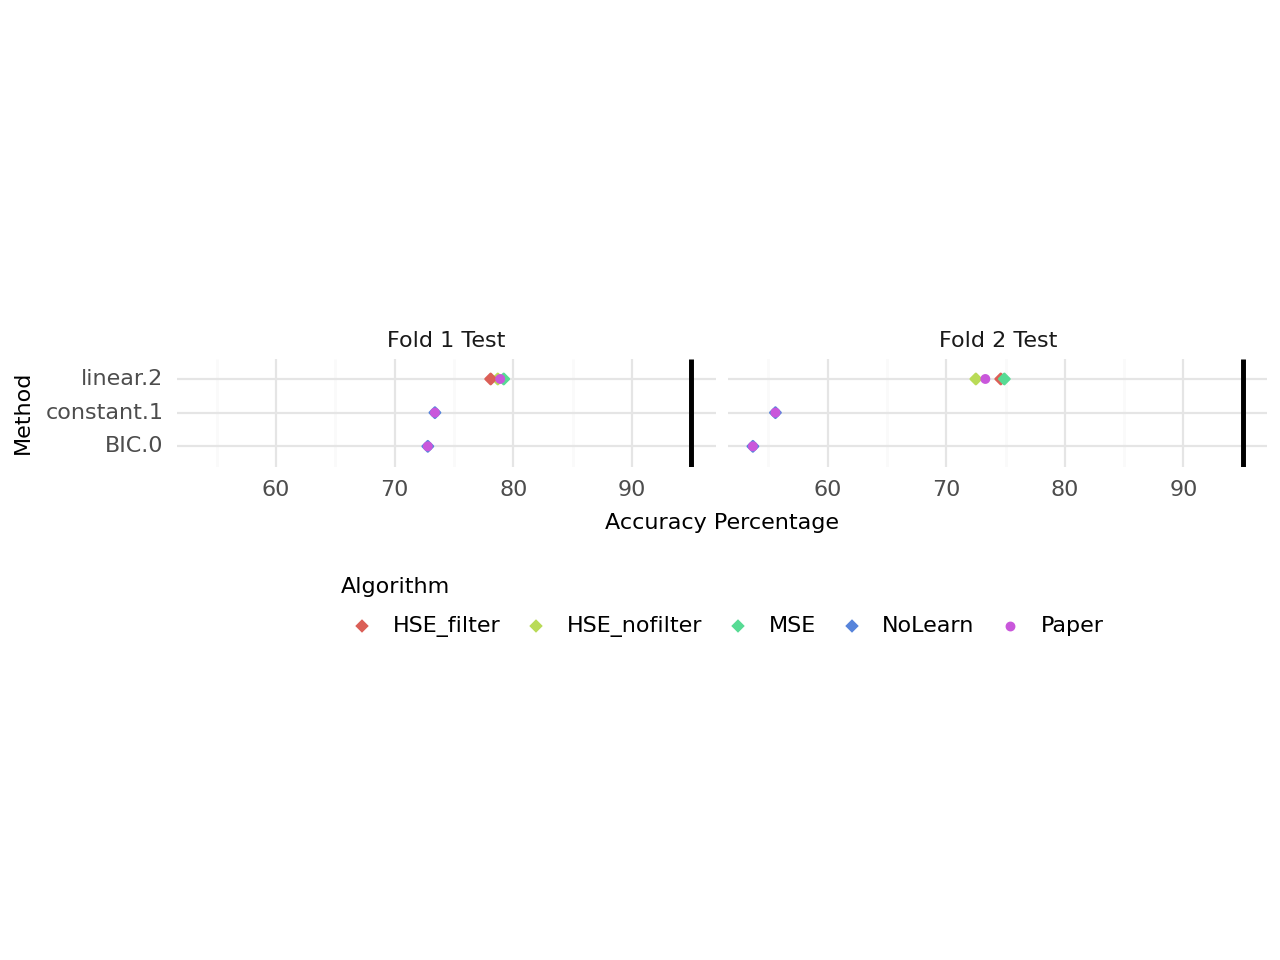

In [29]:
from plotnine import ggplot, aes, geom_point, labs, facet_wrap, geom_vline, theme_minimal, theme, element_text

# data
methods    = ['BIC.0', 'BIC.0',   'constant.1', 'constant.1', 'linear.2', 'linear.2',     'linear.2',   'linear.2']
algorithms = ['Paper', 'NoLearn', 'Paper',      'NoLearn',    'Paper',    'HSE_nofilter', 'HSE_filter', 'MSE']
acc_1      = [72.8,    72.8,      73.4,         73.4,         78.9,       78.7,            78.1,         79.2]
acc_2      = [53.7,    53.7,      55.6,         55.6,         73.3,       72.5,            74.6,         74.9]

# Creating sample data for fold 1
data_fold1 = pd.DataFrame({
    'Method':   methods,
    'Accuracy': acc_1,
    'Algorithm': algorithms,
    'Fold': 'Fold 1 Test'
})

# Creating sample data for fold 2
data_fold2 = pd.DataFrame({
    'Method': methods,
    'Accuracy': acc_2,
    'Algorithm': algorithms,
    'Fold': 'Fold 2 Test'
})

# Combining data for both folds
data = pd.concat([data_fold1, data_fold2])

# Plotting with different shapes for each algorithm
plot_combined = (ggplot(data, aes(x='Accuracy', y='Method', color='Algorithm', shape='Algorithm')) +
                 geom_point(size=1) +
                 labs(title="",
                      x="Accuracy Percentage",
                      y="Method",
                      color="Algorithm") +
                 facet_wrap('~Fold', ncol=2) +
                 geom_vline(xintercept=95, color="black", size=1) +
                 theme_minimal() +
                 theme(legend_position='bottom', text=element_text(size=8)) +
                 theme(aspect_ratio=0.2) +
                 scale_shape_manual(values=["D", "D", "D", "D", "o"])
                 )  # Adjust aspect ratio to decrease the distance between methods

# Displaying the combined plot
print(plot_combined)

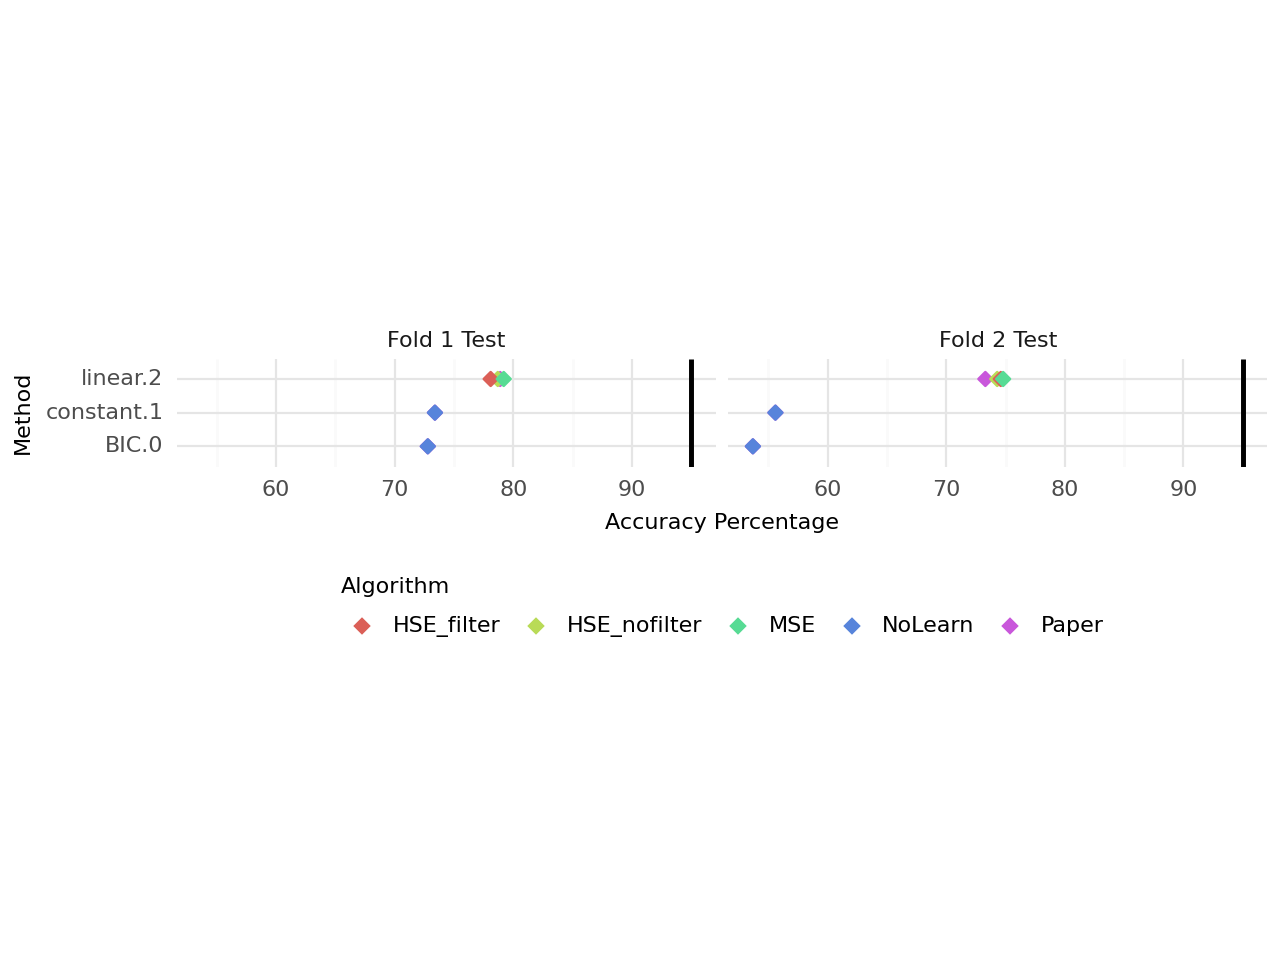

In [20]:
from plotnine import ggplot, aes, geom_point, labs, facet_wrap, geom_vline, theme_minimal, theme, element_text
import pandas as pd

# data
methods    = ['BIC.0', 'BIC.0',   'constant.1', 'constant.1', 'linear.2', 'linear.2',     'linear.2',   'linear.2']
algorithms = ['Paper', 'NoLearn', 'Paper',      'NoLearn',    'Paper',    'HSE_nofilter', 'HSE_filter', 'MSE']
acc_1      = [72.8,    72.8,      73.4,         73.4,         78.9,       78.7,            78.1,         79.2]
acc_2      = [53.7,    53.7,      55.6,         55.6,         73.3,       74.3,            74.6,         74.8]

# Creating sample data for fold 1
data_fold1 = pd.DataFrame({
    'Method':   methods,
    'Accuracy': acc_1,
    'Algorithm': algorithms,
    'Fold': 'Fold 1 Test'
})

# Creating sample data for fold 2
data_fold2 = pd.DataFrame({
    'Method': methods,
    'Accuracy': acc_2,
    'Algorithm': algorithms,
    'Fold': 'Fold 2 Test'
})

# Combining data for both folds
data = pd.concat([data_fold1, data_fold2])

# Plotting with diamond shape for all points
plot_combined = (ggplot(data, aes(x='Accuracy', y='Method', color='Algorithm', shape='Algorithm')) +
                 geom_point(size=1.5) +
                 labs(title="",
                      x="Accuracy Percentage",
                      y="Method",
                      color="Algorithm") +
                 facet_wrap('~Fold', ncol=2) +
                 geom_vline(xintercept=95, color="black", size=1) +
                 theme_minimal() +
                 theme(legend_position='bottom', text=element_text(size=8)) +
                 theme(aspect_ratio=0.2) +  # Adjust aspect ratio to decrease the distance between methods
                 scale_shape_manual(values=5*["D"]))  # Setting all points to diamond shape

# Displaying the combined plot
print(plot_combined)
